# Let's try some Imbalanced Learning!

<hr style = "border: none; height: 2px; background-color: #59C413;">

In this project, i will attempt to build machine learning algorithm, random forest, for classification. This is an imbalanced learning problem, so we have a multi-class imbalanced dataset. The dataset is from kaggle, from Zarana Ramani.

Our aim is to use resampling techniques, namely random undersampling, random oversampling, and SMOTE to correct the class imbalance. Thereafter, employ random forest to classify the resampled dataset. Furthermore, we'll evaluate the performance of the algorithm using f1-score and confusion matrix.

- In this project, i will implement various statistical techniques such as exploratory data analysis, data cleaning, data wrangling, data transformation, feature engineering, resampling, data modeling, and model evaluation, to achieve my goal.

<hr style = "border: none; height: 2px; background-color: #59C413;">

## Let's import our libraries!

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import LinearSegmentedColormap
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
df = pd.read_csv('processed_dataset.csv')
df.columns = df.columns.str.strip()
df.head()

,Age,Gender,Profession,Account apps,Frequently used apps,Started since,Social media usage,Notification Response,SMAQ1D,SMAQ2D,...,SEQ10D,SEQ2D,SEQ5D,SEQ6D,SEQ8D,SEQ9D,SMA,SE,SMA_LABEL,SE_LABEL
0,>35,Male,Doctor,"WhatsApp, Facebook","WhatsApp, Facebook",more than 5 years,1 - 2hours,Immediately only if it's important,1,3,...,3,3,3,3,3,3,8,30,Low Addiction,High Self Esteem
1,19-25,Male,Post Graduate (PG),"WhatsApp, Youtube, Instagram, Facebook, Twitte...","WhatsApp, Youtube, Instagram, Facebook",4 years,2 - 3 hours,Immediately only if it's important,4,1,...,2,2,2,1,1,3,19,20,Moderate Addiction,Moderate Self Esteem
2,19-25,Male,Post Graduate (PG),"WhatsApp, Youtube, Instagram, Facebook, Twitte...","WhatsApp, Youtube, Instagram, Facebook, Twitte...",4 years,2 - 3 hours,Immediately only if it's important,2,3,...,3,2,3,2,2,3,14,24,Moderate Addiction,Moderate Self Esteem
3,19-25,Female,Post Graduate (PG),"WhatsApp, Youtube, Instagram, Twitter, Telegram","WhatsApp, Youtube, Instagram, Telegram, Snapchat",5 years,3 - 4 hours,I put off notifications,2,1,...,3,1,3,3,0,3,13,22,Moderate Addiction,Moderate Self Esteem
4,>35,Male,Post Graduate (PG),"WhatsApp, Youtube, Facebook, Telegram, LinkedIn","WhatsApp, Youtube, Instagram, Facebook, Telegram",more than 5 years,1 - 2hours,Whenever took a phone,3,3,...,2,2,1,2,1,2,19,18,Moderate Addiction,Moderate Self Esteem


## First, let's choose our colors!

<hr style = "border: none; height: 2px; background-color: #59C413;">

For pelatte choice, i will be using WhatsApp theme colors. The purpose of this is for the project to have a social media feel since social media was the main focus of the research from where the dataset belongs.

<hr style = "border: none; height: 2px; background-color: #59C413;">

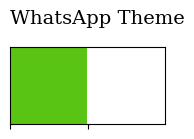

In [5]:
sns.palplot(['#59C413', '#FFFFFF'])
plt.title("WhatsApp Theme", loc = 'left', fontfamily = 'serif',
          fontsize = 14, y = 1.2)
plt.show()

## Let's begin!

<hr style = "border: none; height: 2px; background-color: #59C413;">

**Remember i mentioned that this is an imbalanced learning problem? now, what do i actually mean by that? Well, we'll find out in a bit!**

- Our target variable is 'self esteem label(SE_LABEL)'. So this will be our focus.
- The variable has three classes, namely low, moderate, and high self-esteem.
- More details about the study can be found here: https://link.springer.com/chapter/10.1007/978-3-031-23092-9_3

<hr style = "border: none; height: 2px; background-color: #59C413;">

### Okay, let's have a look at the following chart!

<hr style = "border: none; height: 2px; background-color: #59C413;">

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_14673/3347332995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


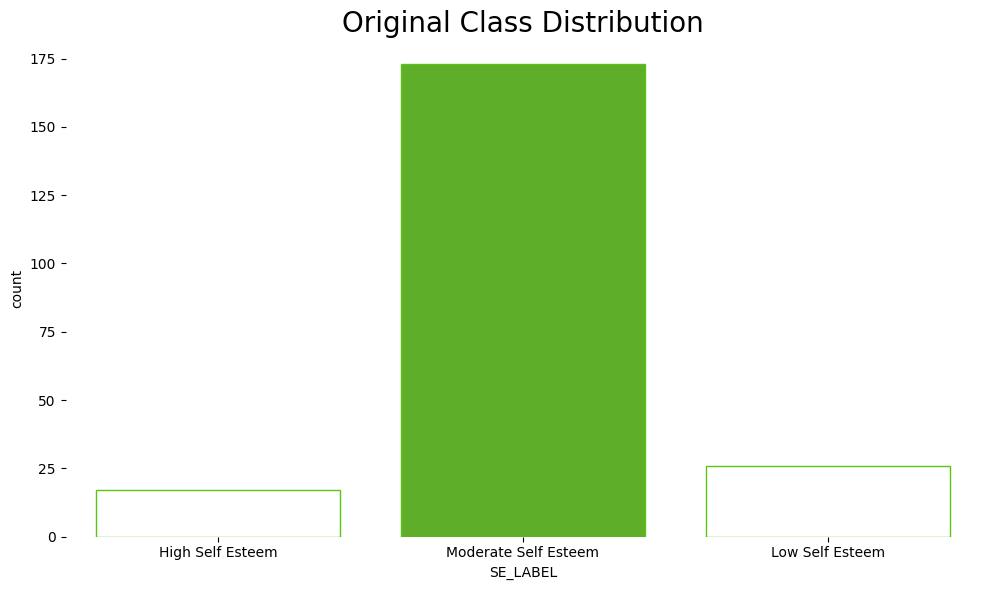

In [6]:
theme = ['#FFFFFF', '#59C413', '#FFFFFF']
plt.figure(figsize=(10, 6))
sns.countplot(
    x='SE_LABEL',
    data=df,
    palette=theme,
    edgecolor='#59C413',
    hue=None,
    legend=False)
plt.title('Original Class Distribution', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()

<hr style = "border: none; height: 2px; background-color: #59C413;">

From the visualization it's pretty obvious that there is a huge difference in the distribution of the three classes. Thus, the dataset is imbalanced. Classifying an imbalanced dataset is a challenge in machine learning because many machine learning algorithms assume even distribution in the dataset. This tends to make algorithms biased towards the majority class. The majority class is a class that is made up by the majority of the dataset samples, and the minority class is the opposite. 

- In this case, the majority class is the moderate self esteem class, and the other two classes, high and low self esteem are the minority classes.

<hr style = "border: none; height: 2px; background-color: #59C413;">

### Let's see what the numbers actually look like.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [7]:
original_shape = df.shape
original_shape

(216, 28)

In [8]:
df['SE_LABEL'].value_counts()

SE_LABEL
Moderate Self Esteem    173
Low Self Esteem          26
High Self Esteem         17
Name: count, dtype: int64

<hr style = "border: none; height: 2px; background-color: #59C413;">

This is just additional confirmation of class imbalance. For a proper classification, we will have to correct the class imbalance before classifying the dataset.

<hr style = "border: none; height: 2px; background-color: #59C413;">

## Now, let's do some Data Cleaning.

<hr style = "border: none; height: 2px; background-color: #59C413;">

- We will deal with missing values, duplicates, and inconsistencies.

<hr style = "border: none; height: 2px; background-color: #59C413;">

### Let's start with missing values and duplicates.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [9]:
df.isnull().sum()

Age                      0
Gender                   0
Profession               0
Account apps             0
Frequently used apps     0
Started since            0
Social media usage       0
Notification Response    0
SMAQ1D                   0
SMAQ2D                   0
SMAQ3D                   0
SMAQ4D                   0
SMAQ5D                   0
SMAQ6D                   0
SEQ1D                    0
SEQ3D                    0
SEQ4D                    0
SEQ7D                    0
SEQ10D                   0
SEQ2D                    0
SEQ5D                    0
SEQ6D                    0
SEQ8D                    0
SEQ9D                    0
SMA                      0
SE                       0
SMA_LABEL                0
SE_LABEL                 0
dtype: int64

In [10]:
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print(f"Number of duplicate rows: {len(duplicates)}")
    print(duplicates)
else:
    print("No duplicate rows found")

No duplicate rows found


<hr style = "border: none; height: 2px; background-color: #59C413;">

Great! The dataset does not have any missing values, and also, there are no duplicates.

<hr style = "border: none; height: 2px; background-color: #59C413;">

### Now, let's deal with inconsistencies.

<hr style = "border: none; height: 2px; background-color: #59C413;">

- To make sure everything is consistent, let's standardize age, profession, started since, social media usage, notification response columns.

<hr style = "border: none; height: 2px; background-color: #59C413;">

**Standardizing 'Age'**

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [11]:
df['Age'] = df['Age'].replace({
    '13-18': '13_18',
    '19-25': '19_25',
    '26-35': '26_35',
    '>35': '35_plus'
})

<hr style = "border: none; height: 2px; background-color: #59C413;">

**Standardizing 'Profession'**

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [12]:
df['Profession'] = df['Profession'].replace({
    'Under Graduate (UG)': 'Undergraduate',
    'Post Graduate (PG)': 'Postgraduate',
    'Ph.d scholar': 'PhD',
    'Phd scholar': 'PhD',
    'PhD': 'PhD',
    'Phd running': 'PhD',
    'Doctor': 'Doctor',
    'B. Ed, M. A, M. Ed': 'Educator',
    'B.ed': 'Educator',
    'M.A BE.d': 'Educator',
    'Government job ni taiyaari': 'Job Preparation',
    'Preparing for net': 'Job Preparation',
    'Preparation for government job': 'Job Preparation',
    'Preparation for competitive exams': 'Job Preparation',
    'Police constable': 'Job Preparation',
    'Unemployee': 'Job Preparation',
    'Job': 'Job',
    'Singer, content writer, translator,': 'Creative Professional',
    'Housewife': 'Housewife',
    'પરીક્ષાની તૈયારી': 'Exam Preparation'
})

rare_categories = df['Profession'].value_counts()[df['Profession']\
.value_counts() < 2].index
df['Profession'] = df['Profession'].replace(rare_categories, 'Other')

<hr style = "border: none; height: 2px; background-color: #59C413;">

- Categories with few occurrences were combined and named 'Other'

<hr style = "border: none; height: 2px; background-color: #59C413;">

**Standardizing 'Started since'**

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [13]:
df['Started since'] = df['Started since'].replace({
    'more than 5 years': 6,
    '5 years': 5,
    'more than 4 years': 5,
    '4 years': 4,
    'more than 3 years': 4,
    '3 years': 3,
    'more than 2 years': 3,
    '2 years': 2,
    'more than 1 year': 2,
    '1 year': 1,
    'less than a year': 0
})

<hr style = "border: none; height: 2px; background-color: #59C413;">

**Standardizing 'Social media usage'**

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [14]:
df['Social media usage'] = df['Social media usage'].replace({
    'less than a hour': 1,
    '1 - 2hours': 2,
    '2 - 3 hours': 3,
    '3 - 4 hours': 4,
    '> 4 hours': 5
})

<hr style = "border: none; height: 2px; background-color: #59C413;">

**Standardizing 'Notification Response'**

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [15]:
df['Notification Response'] = df['Notification Response'].replace({
    'Whenever took a phone': 'On Demand',
    'Immediately only if it\'s important': 'Important',
    'I Don\'t respond if it\'s not important': 'Selective',
    'As soon as possible': 'ASAP',
    'I put off notifications': 'Delayed',
    'Immediately': 'Immediate'
})

<hr style = "border: none; height: 2px; background-color: #59C413;">

### Let's split 'Account apps' and 'frequently used apps' into lists

<hr style = "border: none; height: 2px; background-color: #59C413;">

- This will allow the algorithm to learn from individual app usage patterns for better results.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [16]:
df['Account apps'] = df['Account apps'].str.split(', ')
df['Frequently used apps'] = df['Frequently used apps'].str.split(', ')

## Let's do some Feature Engineering!

<hr style = "border: none; height: 2px; background-color: #59C413;">

- **We'll focus on 'Account apps' and 'Frequently used apps'**

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [17]:
df['num_account_apps'] = df['Account apps'].apply(len)
df['num_frequent_apps'] = df['Frequently used apps'].apply(len)
df.drop(['Account apps', 'Frequently used apps'], axis=1, inplace=True)

<hr style = "border: none; height: 2px; background-color: #59C413;">

- The new features are, num_account_apps(number of account apps), and num_frequent_apps(number of frequently used apps).
- Basically, we just calculated the number of apps in the 'Account apps' and 'Frequently used apps' columns for each row.

<hr style = "border: none; height: 2px; background-color: #59C413;">

- **Now, let's focus on SMAQ1D - SMAQ6D, and SEQ1D - SEQ10D.**
- These are ratings of questions related to social media addiction, and ratings of questions related to self esteem, respectively.
- These are rated on a scale of 1 - 5.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [18]:
df['SEQ_sum'] = df[[f'SEQ{i}D' for i in range(1, 11)]].sum(axis = 1)
df['SMAQ_sum'] = df[[f'SMAQ{i}D' for i in range(1, 7)]].sum(axis = 1)
df.drop(columns = [f'SEQ{i}D' for i in range(1, 11)]
        + [f'SMAQ{i}D' for i in range(1, 7)], inplace = True)

<hr style = "border: none; height: 2px; background-color: #59C413;">

The features were treated as ordinal features. SEQ_sum, and SMAQ_sum summarize the SEQ1D - SEQ10D, and SMAQ1D - SMAQ6D columns by taking their sum respectively for each row. The sum aggregation reflects the cumulative weight of all responses, providing insight into the overall intensity of engagement.

- This reduced the dimensions of the dataset by half.

<hr style = "border: none; height: 2px; background-color: #59C413;">

## Now, let's check and remove outliers.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [19]:
def detect_remove_outliers(df, threshold = 3, freq_cutoff = 0.01):
    df_cleaned = df.copy()
    for col in df_cleaned.select_dtypes(include = [np.number]).columns:
        z_scores = np.abs(stats.zscore(df_cleaned[col]))
        df_cleaned = df_cleaned[z_scores < threshold]
    for col in df_cleaned.select_dtypes(include = [object, 'category']).columns:
        freq = df_cleaned[col].value_counts(normalize=True)
        valid_categories = freq[freq > freq_cutoff].index
        df_cleaned = df_cleaned[df_cleaned[col].isin(valid_categories)]
    return df_cleaned
    
df_cleaned = detect_remove_outliers(df)
print("Rows and columns of original data:", original_shape)
print("Rows and columns of cleaned data:", df_cleaned.shape)

Rows and columns of original data: (216, 28)
Rows and columns of cleaned data: (210, 14)


- 6 rows were removed as a result.

<hr style = "border: none; height: 2px; background-color: #59C413;">

### How does this work?

For continuous variables, the z-scores of each value were calculated and rows where the z-score exceeds a specified threshold, indicating extreme values, were removed. For categorical variables, it computes the relative frequency of each category and filters out categories with a frequency below a defined cutoff, thus retaining only commonly occurring categories.

<hr style = "border: none; height: 2px; background-color: #59C413;">

## Now, let's **encode categorical variables.**

<hr style = "border: none; height: 2px; background-color: #59C413;">

- First, let's view our variable types.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 215
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    210 non-null    object
 1   Gender                 210 non-null    object
 2   Profession             210 non-null    object
 3   Started since          210 non-null    int64 
 4   Social media usage     210 non-null    int64 
 5   Notification Response  210 non-null    object
 6   SMA                    210 non-null    int64 
 7   SE                     210 non-null    int64 
 8   SMA_LABEL              210 non-null    object
 9   SE_LABEL               210 non-null    object
 10  num_account_apps       210 non-null    int64 
 11  num_frequent_apps      210 non-null    int64 
 12  SEQ_sum                210 non-null    int64 
 13  SMAQ_sum               210 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 24.6+ KB


### Let's start by encoding nominal variables.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [21]:
df_encoded = pd.get_dummies(df_cleaned[['Gender', 'Notification Response']],
                            drop_first=True)
df_encoded = df_encoded.astype(int)
df = pd.concat([df_cleaned.drop(['Gender', 'Notification Response'], axis=1),
                df_encoded], axis=1)

### Now, let's encode other categorical variables.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [22]:
label_encoder = LabelEncoder()
df['Profession'] = label_encoder.fit_transform(df['Profession'])

### Now, let's encode ordinal variables.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [23]:
label_mappings = {
    'Age': {'13_18': 0, '19_25': 1, '26_35': 2, '35_plus': 3},
    'SMA_LABEL': {
        'High Risk Of Addiction': 0,
        'High Addiction': 1,
        'Moderate Addiction': 2,
        'Low Addiction': 3
    },
    'SE_LABEL': {
        'Low Self Esteem': 0,
        'Moderate Self Esteem': 1,
        'High Self Esteem': 2
    }
}
for column, mapping in label_mappings.items():
    df[column] = df[column].map(mapping)

<hr style = "border: none; height: 2px; background-color: #59C413;">

- **For our variable of interest, i.e. self-esteem label, low self-esteem has been encoded as 0, moderate self-esteem as 1, and high self-esteem as 2.**

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [24]:
df.head(3)

,Age,Profession,Started since,Social media usage,SMA,SE,SMA_LABEL,SE_LABEL,num_account_apps,num_frequent_apps,SEQ_sum,SMAQ_sum,Gender_Male,Notification Response_Delayed,Notification Response_Immediate,Notification Response_Important,Notification Response_On Demand,Notification Response_Selective
0,3,3,6,2,8,30,3,2,2,2,30,8,1,0,0,1,0,0
1,1,4,4,3,19,20,2,1,7,4,20,19,1,0,0,1,0,0
2,1,4,4,3,14,24,2,1,7,7,24,14,1,0,0,1,0,0


## Let's do Feature Selection.

<hr style = "border: none; height: 2px; background-color: #59C413;">

For this task, we'll use mutual information and pick the top 10 most relevant features.
- Someone can ask why don't  i use Random Forest for evaluating feature importance?, well, I preferred to go with a model-independent feature evaluation.
- This will also help simplify our project since we have to fit our algorithm three times. i.e. We would have to fit our algorithm to undersampled, oversampled and SMOTE resampled dataset.
- Therefore, we'll avoid having to do feature selection three times.

<hr style = "border: none; height: 2px; background-color: #59C413;">

- **Now, we'll split the dataset using a 70:30 ratio. 70% for the training set and 30% for the testing set.**

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [25]:
X = df.drop(columns=['SE_LABEL'])
y = df['SE_LABEL'] 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [27]:
y.value_counts()

SE_LABEL
1    168
0     25
2     17
Name: count, dtype: int64

In [28]:
y_train.value_counts()

SE_LABEL
1    115
0     19
2     13
Name: count, dtype: int64

In [29]:
y_test.value_counts()

SE_LABEL
1    53
0     6
2     4
Name: count, dtype: int64

<hr style = "border: none; height: 2px; background-color: #59C413;">

We have the distributions of self-esteem label after we removed outliers, the distribution of the self-esteem label for the training set, the distribution of the self-esteem label for the testing set.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [30]:
mi = mutual_info_classif(X_train, y_train, random_state = 42)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Mutual Information': mi
}).sort_values(by = 'Mutual Information', ascending = False)
feature_importance

,Feature,Mutual Information
9,SEQ_sum,0.532941
5,SE,0.501219
4,SMA,0.110401
10,SMAQ_sum,0.055641
16,Notification Response_Selective,0.018089
15,Notification Response_On Demand,0.010460
6,SMA_LABEL,0.009937
12,Notification Response_Delayed,0.009103
2,Started since,0.003926
11,Gender_Male,0.001316


<hr style = "border: none; height: 2px; background-color: #59C413;">

- **We have our mutual information scores. Now, let's choose the ten most relevant features.**

<hr style = "border: none; height: 2px; background-color: #59C413;">

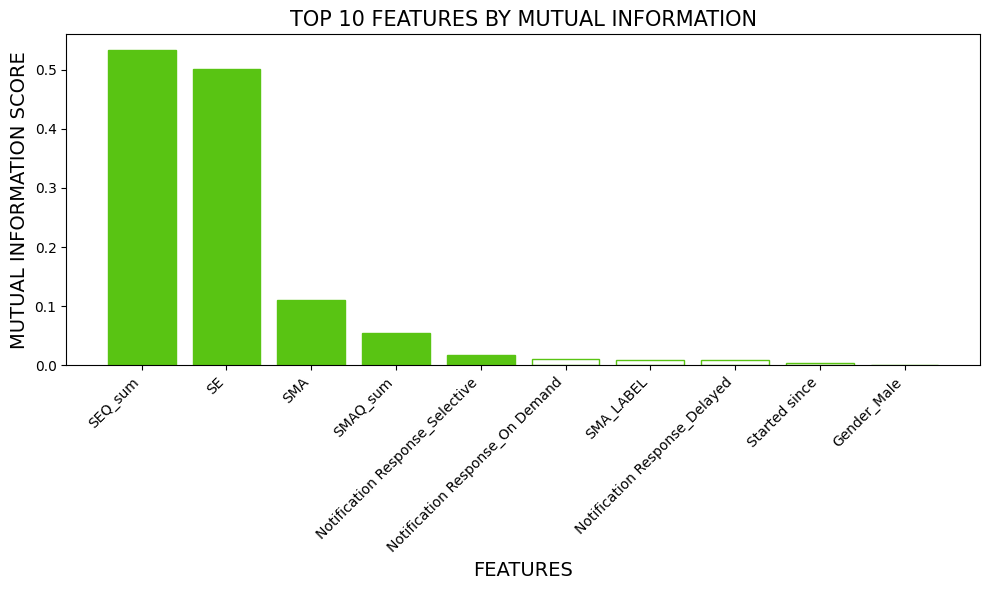

In [31]:
top_10_features = feature_importance.head(10)
colors = ['#59C413', '#59C413', '#59C413', '#59C413', '#59C413', '#FFFFFF',
          '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF']
plt.figure(figsize = (10, 6))
bars = plt.bar(top_10_features['Feature'], top_10_features['Mutual Information'],
               color = colors, edgecolor = '#59C413')
plt.title('TOP 10 FEATURES BY MUTUAL INFORMATION', fontsize = 15)
plt.xlabel('FEATURES', fontsize = 14)
plt.ylabel('MUTUAL INFORMATION SCORE', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

## Now, let's resample our selected features!

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [32]:
X_train_top10 = X_train[top_10_features['Feature'].values]

In [33]:
def plot_resampling_results(y_resampled, title, class_labels):
    colors = {
        0: '#FFFFFF',
        1: '#59C413',
        2: '#FFFFFF'
    }
    palette = [colors[label] for label in class_labels]
    plt.figure(figsize=(7, 4))
    sns.countplot(x=pd.Series(y_resampled), palette=palette, 
                  order=class_labels, edgecolor='#59C413')
    plt.title(title)
    plt.xlabel('Class Labels')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

<hr style = "border: none; height: 2px; background-color: #59C413;">

### Let's start with Random Undersampling.

<hr style = "border: none; height: 2px; background-color: #59C413;">

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_14673/904181770.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Series(y_resampled), palette=palette,


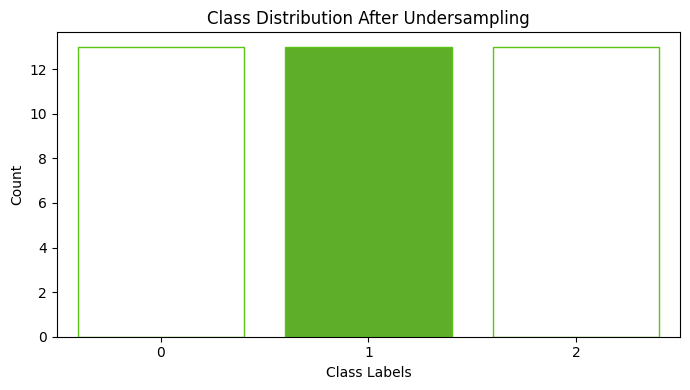

In [34]:
rus = RandomUnderSampler(random_state=101)
X_rus, y_rus = rus.fit_resample(X_train_top10, y_train)
class_labels = sorted(y_train.unique())
plot_resampling_results(y_rus, 'Class Distribution After Undersampling',
                        class_labels)

In [35]:
y_rus.value_counts()

SE_LABEL
0    13
1    13
2    13
Name: count, dtype: int64

<hr style = "border: none; height: 2px; background-color: #59C413;">

#### Now, let's train and test our algorithm!

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [36]:
model_1 = RandomForestClassifier(n_jobs=-1, random_state=42)
model_1.fit(X_rus, y_rus)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [37]:
X_test_top10 = X_test[top_10_features['Feature'].values]

In [38]:
y_pred_1 = model_1.predict(X_test_top10)

In [39]:
print(y_pred_1)

[1 0 1 1 2 1 1 0 1 1 1 1 0 2 1 1 1 0 1 1 0 1 1 1 1 2 0 1 1 2 1 1 1 2 1 1 1
 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 2 2 1 1 1 1 1]


<hr style = "border: none; height: 2px; background-color: #59C413;">

#### Now, let's evaluate the algorithm.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [40]:
class_report = classification_report(y_test, y_pred_1)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.89      0.94        53
           2       0.50      1.00      0.67         4

    accuracy                           0.90        63
   macro avg       0.75      0.96      0.82        63
weighted avg       0.94      0.90      0.91        63



<hr style = "border: none; height: 2px; background-color: #59C413;">

When the data is undersampled:
- The algorithm has its best performance on the moderate self-esteem class(1), indicated by an f1-score of 94%.
- The algorithm performs very poorly on the high self-esteem class(2), indicated by its lowest f1-score of 67%.
- Hence, the algorithm performs well on the majority class, and struggles with identifying the minority classes.

<hr style = "border: none; height: 2px; background-color: #59C413;">

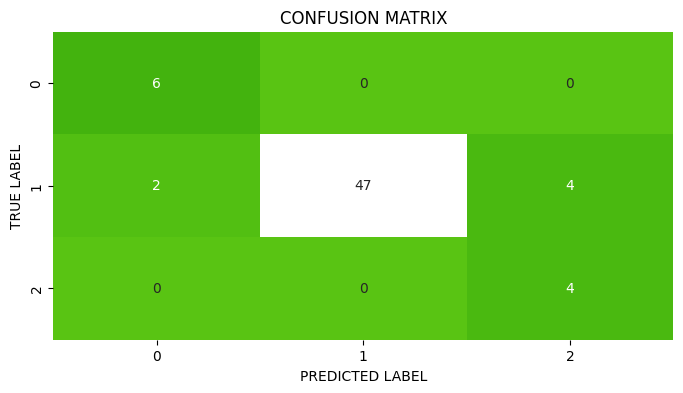

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred_1)
def plot_confusion_matrix(conf_matrix, classes):
    cmap = LinearSegmentedColormap.from_list("black_red_white",
                                             ["#59C413", "#008000", "#FFFFFF"],
                                             N=256)
    plt.figure(figsize=(8, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('PREDICTED LABEL')
    plt.ylabel('TRUE LABEL')
    plt.title('CONFUSION MATRIX')
    plt.show()  
plot_confusion_matrix(conf_matrix, model_1.classes_)

<hr style = "border: none; height: 2px; background-color: #59C413;">

- Two samples of the moderate self-esteem class(1) were misclassified as low self-esteem class(0) samples.
- Four other samples of the moderate self-esteem class were misclassified as high self-esteem class(2).
- It's evident that the algorithm struggles to differentiate between class 0 and class 1, and also class 1 and class 2.

<hr style = "border: none; height: 2px; background-color: #59C413;">

### Now, let's do Random Oversampling.

<hr style = "border: none; height: 2px; background-color: #59C413;">

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_14673/904181770.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Series(y_resampled), palette=palette,


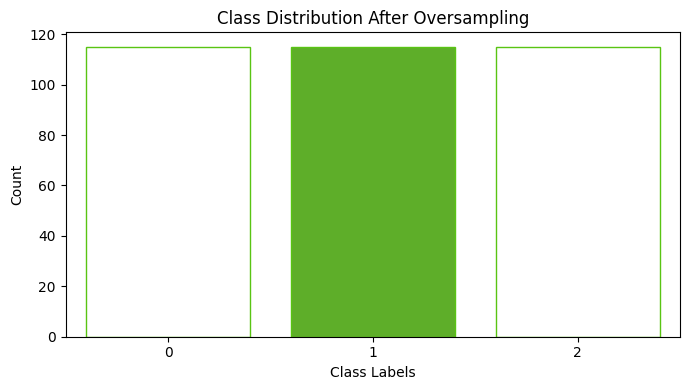

In [42]:
ros = RandomOverSampler(random_state=111)
X_ros, y_ros = ros.fit_resample(X_train_top10, y_train)
class_labels = sorted(y_train.unique())
plot_resampling_results(y_ros, 'Class Distribution After Oversampling',
                        class_labels)

In [43]:
y_train.value_counts()

SE_LABEL
1    115
0     19
2     13
Name: count, dtype: int64

In [44]:
y_ros.value_counts()

SE_LABEL
1    115
2    115
0    115
Name: count, dtype: int64

<hr style = "border: none; height: 2px; background-color: #59C413;">

#### Now, let's train and test our algorithm!

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [45]:
model_2 = RandomForestClassifier(n_jobs=-1, random_state=42)
model_2.fit(X_ros, y_ros)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [46]:
y_pred_2 = model_2.predict(X_test_top10)

In [47]:
print(y_pred_2)

[1 0 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1
 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]


<hr style = "border: none; height: 2px; background-color: #59C413;">

#### Now, let's evaluate the algorithm.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [48]:
class_report = classification_report(y_test, y_pred_2)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00         4

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



<hr style = "border: none; height: 2px; background-color: #59C413;">

When the data is oversampled:
- The algorithm achieved an f1-score of 100% for all the classes, indicating that the algorithm has a perfect performance on the low, moderate and high self-esteem class.

<hr style = "border: none; height: 2px; background-color: #59C413;">

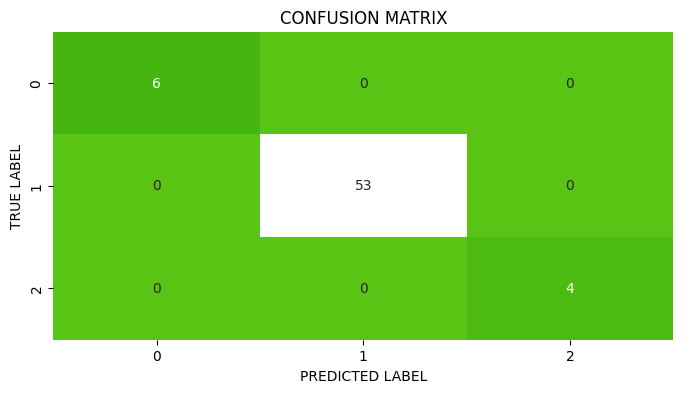

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred_2)
def plot_confusion_matrix(conf_matrix, classes):
    cmap = LinearSegmentedColormap.from_list("black_red_white",
                                             ["#59C413", "#008000", "#FFFFFF"],
                                             N=256)
    plt.figure(figsize=(8, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('PREDICTED LABEL')
    plt.ylabel('TRUE LABEL')
    plt.title('CONFUSION MATRIX')
    plt.show()    
plot_confusion_matrix(conf_matrix, model_2.classes_)

<hr style = "border: none; height: 2px; background-color: #59C413;">

- The confusion matrix shows that there is perfect classification performance across all of the three classes.
- Hence, there are no misclassifications in any of the classes.

<hr style = "border: none; height: 2px; background-color: #59C413;">

### Now, let's do SMOTE.

<hr style = "border: none; height: 2px; background-color: #59C413;">

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_14673/904181770.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Series(y_resampled), palette=palette,


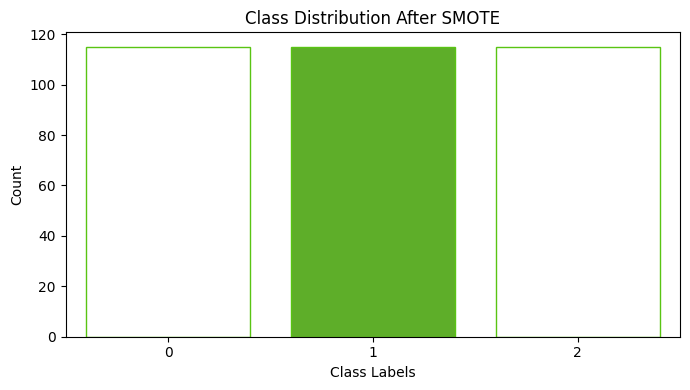

In [50]:
smote = SMOTE(random_state=123)
X_smote, y_smote = smote.fit_resample(X_train_top10, y_train)
class_labels = sorted(y_train.unique())
plot_resampling_results(y_smote, 'Class Distribution After SMOTE', class_labels)

In [51]:
y_train.value_counts()

SE_LABEL
1    115
0     19
2     13
Name: count, dtype: int64

In [52]:
y_smote.value_counts()

SE_LABEL
1    115
2    115
0    115
Name: count, dtype: int64

<hr style = "border: none; height: 2px; background-color: #59C413;">

#### Now, let's train and test our algorithm!

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [53]:
model_3 = RandomForestClassifier(n_jobs=-1, random_state=42)
model_3.fit(X_smote, y_smote)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [54]:
y_pred_3 = model_3.predict(X_test_top10)

In [55]:
print(y_pred_3)

[1 0 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1
 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]


<hr style = "border: none; height: 2px; background-color: #59C413;">

#### Now, let's evaluate the algorithm.

<hr style = "border: none; height: 2px; background-color: #59C413;">

In [56]:
class_report = classification_report(y_test, y_pred_3)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00         4

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



<hr style = "border: none; height: 2px; background-color: #59C413;">

When the data is SMOTE-resampled:
- The achieved an f1-score of 100% for all the classes, indicating that the algorithm has a perfect performance on the low, moderate and high self-esteem class.

<hr style = "border: none; height: 2px; background-color: #59C413;">

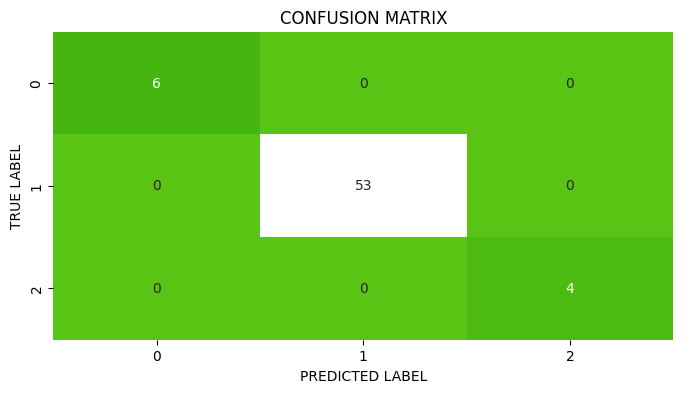

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred_3)
def plot_confusion_matrix(conf_matrix, classes):
    cmap = LinearSegmentedColormap.from_list("black_red_white", 
                                             ["#59C413", "#008000", "#FFFFFF"], 
                                             N=256)
    plt.figure(figsize=(8, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('PREDICTED LABEL')
    plt.ylabel('TRUE LABEL')
    plt.title('CONFUSION MATRIX')
    plt.show() 
plot_confusion_matrix(conf_matrix, model_3.classes_)

<hr style = "border: none; height: 2px; background-color: #59C413;">

- The confusion matrix shows that there is perfect classification performance across all the three classes.
- Hence  there are no misclassifications in any of the classes.

<hr style = "border: none; height: 2px; background-color: #59C413;">

# Conclusion

<hr style = "border: none; height: 2px; background-color: #59C413;">

The algorithm excels on oversampled data (both random oversampling and SMOTE), achieving perfect scores across all metrics and classes. However, it struggles with undersampled data, with performance dropping to its lowest at a 67% F1 score

<hr style = "border: none; height: 4px; background-color: #59C413;">